#### Mortality Rate

    COVID-19 pandemic has brought a lot of changes in human life and taught us various life lessons. Symptoms are enough to seek help and get tested but when you also have a dataset related to symptoms, it can help in predicting the mortality rate across regions. That would really help the government and health workers in making key decisions.

#### Goal: 

    Build a Machine learning model that can predict the mortality rate based on different symptoms and the patient’s condition.

#### Data Description: 

    Data is collected by health workers from a wide range of patients. This data set consists of a variety of attributes that explains different symptoms and different immunity levels of patients.

#### Provided Files:

    training_data: This file consists of all features. It should be used for both training and model validation purposes.
    test_data: Test file consists of all attributes except the target variable and the prediction is to be made for all the rows in the test file.
    Sample_Submission: This file is an example of how the solution file is to be created.

#### Evaluation Criteria: 

    The metric of evaluation for the prediction is Normalized Root Mean Squared Error (RMSE). The score is calculated by (1-rmse/normalization factor)*100.

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error
from numpy import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/home/metagogy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/metagogy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

### Loading data

In [2]:
train_data = pd.read_excel('/home/training_data.xlsx')
test_data = pd.read_excel('/home/test_data.xlsx')
submittion_data = pd.read_csv('/home/sample_submission_.csv')

### Displaying first five rows of training data

In [3]:
train_data.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Displaying first five rows of testing data

In [4]:
test_data.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days"
0,155,Mild only,Both,48.900000,0.3410,0.325,0.1510,0.1190,0.0630,NaN,...,NaN,23.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,156,Severe/Critical Only,Both,NaN,0.7500,0.680,0.2500,0.1700,0.1100,0.1100,...,NaN,37.0,36.0,NaN,1.0,NaN,0.06,NaN,10.0,16.0
2,156,Severe/Critical Only,Ventilation only,NaN,0.7900,0.740,0.2600,0.2400,0.1800,0.1500,...,NaN,48.0,39.0,NaN,1.0,NaN,0.05,NaN,12.0,17.0
3,156,Severe/Critical Only,Non-ventilation only,NaN,0.6800,0.580,0.2100,0.0500,0.0000,0.0500,...,NaN,27.0,35.0,NaN,1.0,NaN,0.06,NaN,0.0,13.0
4,157,All,Both,52.943333,0.4654,NaN,0.2121,0.0938,0.0733,0.0327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observing how the submission file looks like

In [5]:
print(submittion_data)

      Row_ID  Global_Sales
0          0             0
1          1             0
2          2             0
3          3             0
4          4             0
...      ...           ...
2013    2013             0
2014    2014             0
2015    2015             0
2016    2016             0
2017    2017             0

[2018 rows x 2 columns]


### Shape of our training dataset

##### Dataset has 475 rows and 91 columns

In [6]:
train_data.shape

(475, 91)

### Using describe() we can calculate count, mean, standard deviation, min, max,... of our data

In [7]:
train_data.describe()

,ID,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
count,475.000000,252.000000,430.000000,222.00000,309.000000,325.000000,295.000000,262.000000,233.000000,192.000000,...,14.000000,14.000000,4.000000,9.000000,3.000000,13.000000,11.000000,8.000000,15.000000,36.000000
mean,94.324211,51.093536,0.547413,0.48413,0.286662,0.147790,0.142180,0.066283,0.075804,0.037113,...,23.832143,34.110714,0.807250,0.764589,0.066667,0.101615,0.177909,11.375000,20.873333,0.142222
std,51.058213,18.572915,0.263608,0.35929,0.288207,0.201715,0.241088,0.150995,0.212610,0.090475,...,7.519759,9.481484,0.169224,0.298162,0.020817,0.138349,0.219794,14.411677,10.863995,0.255568
min,1.000000,0.170000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,22.000000,0.625000,0.000000,0.050000,0.000000,0.000000,0.000000,4.100000,0.000000
25%,58.500000,43.300000,0.451175,0.18050,0.078000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.112500,30.000000,0.691750,0.802300,0.055000,0.010000,0.040000,0.000000,15.500000,0.000000
50%,96.000000,52.450000,0.540600,0.40075,0.206000,0.101000,0.060500,0.017950,0.008000,0.000000,...,26.000000,31.500000,0.802000,0.810000,0.060000,0.026000,0.068000,7.500000,21.000000,0.010000
75%,131.500000,64.000000,0.670000,0.82000,0.395000,0.180000,0.150500,0.077675,0.052000,0.040000,...,27.825000,36.750000,0.917500,0.846000,0.075000,0.200000,0.237000,14.500000,24.500000,0.210000
max,199.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,39.000000,61.000000,1.000000,1.000000,0.090000,0.421000,0.600000,34.000000,52.000000,1.000000


### Finding how many missing values are present in our training data in percentage

In [8]:
round(train_data.isnull().sum()/train_data.shape[0],2)*100

ID              0.0
Severity        4.0
Ventilation    37.0
Mean Age       47.0
% Male          9.0
               ... 
Unnamed: 86    97.0
Unnamed: 87    98.0
Unnamed: 88    98.0
Unnamed: 89    97.0
Unnamed: 90    92.0
Length: 91, dtype: float64

### Removing columns which have more than 75% of missing values in training data

In [10]:
df_train=train_data[train_data.columns[train_data.isnull().mean() < 0.75]]

### After removing unwanted columns we left with 46 features

In [11]:
df_train.shape

(475, 46)

### Obeserving columns names

In [12]:
print(df_train.columns)

Index(['ID', 'Severity', 'Ventilation', 'Mean Age', '% Male',
       'Any Comorbidity', 'Hypertension', 'Diabetes',
       'Cardiovascular Disease (incl. CAD)', 'Chronic obstructive lung (COPD)',
       'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
       'Chronic kidney/renal disease', 'Other', 'Fever (temperature ≥37·3°C)',
       'Cough', 'Shortness of Breath (dyspnoea)', 'Headache',
       'Sputum (/Expectoration)', 'Myalgia (Muscle Pain)', 'Fatigue',
       'Diarrhoea', 'Nausea or Vomiting', 'Disease Severity Asymptomatic',
       'Disease Severity General', 'Disease Severity Severe',
       'Disease Severity Critical', 'White Blood Cell Count (10^9/L) - Median',
       'White Blood Cell Count (10^9/L) - LQ',
       'White Blood Cell Count (10^9/L) - UQ',
       'Lymphocyte Count (10^9/L) - Median', 'Lymphocyte Count (10^9/L) - LQ',
       'Lymphocyte Count (10^9/L) - UQ', 'Platelet Count (10^9/L) - Median',
       'Platelet Count (10^9/L) - LQ', 'Platelet Coun

### Let's see what is the datatype of each column

Lets have a look at the kind of data types that is being used to store the variables in pandas.

pandas info() method on dataframe allows to do that. For each variable we can see the number of non-null values along with their datatypes.

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

##### Looks like we have a mixture of datatypes, a lot of these variables are numeric datatypes. Object datatypes are used to store strings along with other non-numeric data.

##### Note: Machine Learning Models understand only numbers so we will have to later convert these strings to numbers

#### If you had observed columns 'Hospital length of stay, days' and 'Mortality' are in object datatype let's see what is the issue

### Let's see how many unique values are present in 'Mortality' column

In [16]:
print(df_train['Mortality'].unique())

[0.28 1 0 0.16 0.15 0.17 0.04 0.07 0.06 0.25 0.64 0.55 0.79 0.01 0.08 0.22
 0.38 0.11 0.1 0.03 0.35 0.67 0.52 0.34 0.45 0.2 0.05 0.36 0.23 0.3 0.09
 0.49 0.02 0.14 0.12 0.21 0.62 0.48 0.47 0.54 0.4 0.63 0.6 0.51 0.5 0.27
 0.56 0.18 0.29 0.76 0.19 'na' 0.26 '0%%' 0.41 0.7 0.66 0.42 0.9 0.32 0.39
 0.58]


### If you observe we have two values as 'na' and '0%%'. I will replace with '0'

In [17]:
df_train['Mortality'].replace('na',0,inplace=True)

In [18]:
df_train['Mortality'].replace('0%%',0,inplace=True)

### Missing values has replaced in 'Mortality' column

In [19]:
df_train['Mortality'].unique()

array([0.28, 1.  , 0.  , 0.16, 0.15, 0.17, 0.04, 0.07, 0.06, 0.25, 0.64,
       0.55, 0.79, 0.01, 0.08, 0.22, 0.38, 0.11, 0.1 , 0.03, 0.35, 0.67,
       0.52, 0.34, 0.45, 0.2 , 0.05, 0.36, 0.23, 0.3 , 0.09, 0.49, 0.02,
       0.14, 0.12, 0.21, 0.62, 0.48, 0.47, 0.54, 0.4 , 0.63, 0.6 , 0.51,
       0.5 , 0.27, 0.56, 0.18, 0.29, 0.76, 0.19, 0.26, 0.41, 0.7 , 0.66,
       0.42, 0.9 , 0.32, 0.39, 0.58])

In [20]:
df_train['Mortality'].dtype

dtype('float64')

In [21]:
df_train['Mortality']=pd.to_numeric(df_train['Mortality'])

### Similarly lets see 'Hospital length of stay, days' column unique values

In [23]:
print(df_train['Hospital length of stay, days'].unique())

[11 7.5 12 15 14 16 23.2 nan 17 13 18.5 4 14.5 10 8.4 8.6 18 19.5 13.8
 16.4 17.22 17.41 19.43 15.7 15.14 12.67 5 17.81 8 20 16.68 16.5 10.5 12.2
 11.6 19 18.3 26.5 21.25 11.2 2 7 12.71 10.56 9 12.5 10.45 11.16 9.27 6.5
 12.7 53 51 55 20.8 21 23 4.6 30 13.5 27.5 39 16.63 17.27 14.94 28 15.08
 22 26 23.7 24.9 21.9 25.3 31 20.1 'na' 12.9 11.4 15.4 22.5 5.36 0 7.31]


### Replacing 'na' and 'nan' to '0'

In [24]:
df_train['Hospital length of stay, days'].replace('na',0,inplace=True)

In [29]:
df_train['Hospital length of stay, days'].replace('nan',0,inplace=True)

In [30]:
print(df_train['Hospital length of stay, days'].unique())

[11.    7.5  12.   15.   14.   16.   23.2    nan 17.   13.   18.5   4.
 14.5  10.    8.4   8.6  18.   19.5  13.8  16.4  17.22 17.41 19.43 15.7
 15.14 12.67  5.   17.81  8.   20.   16.68 16.5  10.5  12.2  11.6  19.
 18.3  26.5  21.25 11.2   2.    7.   12.71 10.56  9.   12.5  10.45 11.16
  9.27  6.5  12.7  53.   51.   55.   20.8  21.   23.    4.6  30.   13.5
 27.5  39.   16.63 17.27 14.94 28.   15.08 22.   26.   23.7  24.9  21.9
 25.3  31.   20.1   0.   12.9  11.4  15.4  22.5   5.36  7.31]


In [32]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

#### We have successfully converted 'Hospital length of stay, days' and 'Mortality' columns into numerical

### Let's now observed categorical variables i.e., 'Severity' and 'Ventilation'

In [33]:
df_train['Severity'].value_counts()

All                     211
Severe/Critical Only    144
Mild only                91
Both                      5
Mild                      2
Severe                    2
Severe/critical only      2
Asymptomatic only         1
Name: Severity, dtype: int64

In [43]:
df_train['Ventilation'].value_counts()

Both                    197
Unknown                 174
Non-ventilation only     66
Ventilation only         19
Yes                      12
ΝΑ                        4
No                        3
Name: Ventilation, dtype: int64

### Performing fillna() in both 'Severity' and 'Ventilation' columns

In [35]:
df_train['Severity'].fillna('Unknown',inplace=True)

In [44]:
df_train['Ventilation'].fillna('Unknown',inplace=True)

In [45]:
df_train['Ventilation'].isnull().sum()

0

### Replacing mean values in place of remaining missing values our entire training dataset

In [46]:
df_train.fillna(df_train.mean(),inplace=True)

In [48]:
print(df_train.isnull().sum())

ID                                          0
Severity                                    0
Ventilation                                 0
Mean Age                                    0
% Male                                      0
Any Comorbidity                             0
Hypertension                                0
Diabetes                                    0
Cardiovascular Disease (incl. CAD)          0
Chronic obstructive lung (COPD)             0
Cancer (Any)                                0
Liver Disease (any)                         0
Cerebrovascular Disease                     0
Chronic kidney/renal disease                0
Other                                       0
Fever (temperature ≥37·3°C)                 0
Cough                                       0
Shortness of Breath (dyspnoea)              0
Headache                                    0
Sputum (/Expectoration)                     0
Myalgia (Muscle Pain)                       0
Fatigue                           

### Converting Categorical variables into numerical using LabelEncoder

In [49]:
# Create LabelEncoder object

encode = LabelEncoder()

# Encoding 'Severity' column

df_train['Severity'] = encode.fit_transform(df_train['Severity']).astype('float32')

In [51]:
# Encoding 'Ventilation' column

df_train['Ventilation'] = encode.fit_transform(df_train['Ventilation']).astype('float32')

### Lets verify whether its encoded 

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  475 non-null    float32
 2   Ventilation                               475 non-null    float32
 3   Mean Age                                  475 non-null    float64
 4   % Male                                    475 non-null    float64
 5   Any Comorbidity                           475 non-null    float64
 6   Hypertension                              475 non-null    float64
 7   Diabetes                                  475 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        475 non-null    float64
 9   Chronic obstructive lung (COPD)           475 non-null    float64
 10  Cancer (Any)                          

## **Analyzing Each Variable & their relationships**

There are two types of features that we have:

1. Categorical
2. Numerical

Also our target is continuous

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'Mortality'

### As this is time consuming process I am performing only correlation (BiVariate Analysis)

### Selecting features based on correlation (Feature Selection)

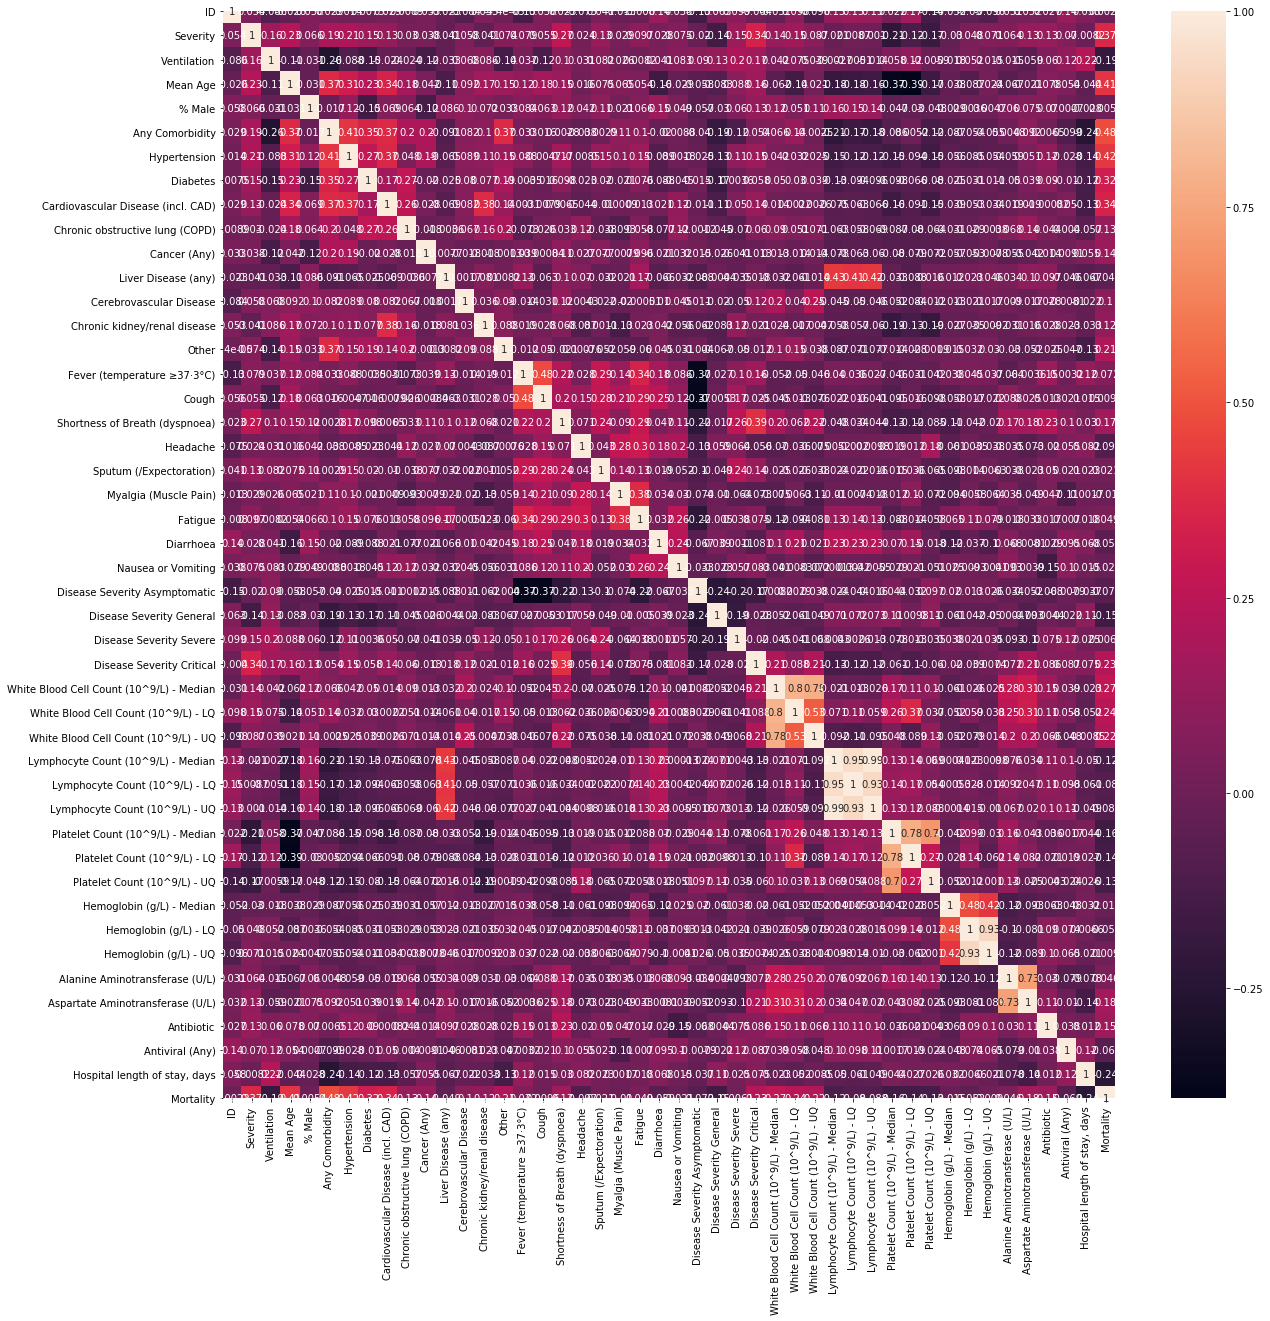

In [56]:
#Generating the correlation matrix

corr = df_train.corr()

plt.figure(figsize=(20, 20))

#Generating the correlation heat-map
_ = sns.heatmap(corr, annot=True)

### Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9


In [57]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_train.columns[columns]

In [58]:
data = df_train[selected_columns]

### Now, the dataset has only those columns with correlation less than 0.9

In [59]:
data.shape

(475, 43)

### Splitting the data into train and validation sets

In [60]:
X = data.drop('Mortality',axis=1)
y = data['Mortality']

In [64]:
X_train = X.iloc[:-53]

X_val = X.iloc[422:]

y_train = y.iloc[:-53]

y_val = y.iloc[422:]

### Let's preprocess the testing dataset just like we did with training dataset

In [69]:
X_test = test_data[X_val.columns]

### We have 53 rows and 42 columns

In [71]:
X_test.shape

(53, 42)

In [72]:
X_val.shape

(53, 42)

### Filling values in both 'Severity' and 'Ventilation' columns

In [73]:
X_test['Severity'].fillna('Unknown',inplace=True)

In [74]:
X_test['Ventilation'].value_counts()

Both                    38
Ventilation only         6
Non-ventilation only     2
Name: Ventilation, dtype: int64

In [75]:
X_test['Ventilation'].fillna('Unknown',inplace=True)

### Filling with mean values in remaining columns

In [77]:
X_test.fillna(X_test.mean(),inplace=True)

In [79]:
X_test.isnull().any()

ID                                          False
Severity                                    False
Ventilation                                 False
Mean Age                                    False
% Male                                      False
Any Comorbidity                             False
Hypertension                                False
Diabetes                                    False
Cardiovascular Disease (incl. CAD)          False
Chronic obstructive lung (COPD)             False
Cancer (Any)                                False
Liver Disease (any)                         False
Cerebrovascular Disease                     False
Chronic kidney/renal disease                False
Other                                       False
Fever (temperature ≥37·3°C)                 False
Cough                                       False
Shortness of Breath (dyspnoea)              False
Headache                                    False
Sputum (/Expectoration)                     False


### Converting Categorical variables into numerical using LabelEncoder

In [80]:
# Create LabelEncoder object

encode = LabelEncoder()

# Encoding 'Severity' column

X_test['Severity'] = encode.fit_transform(X_test['Severity']).astype('float32')

In [81]:
# Encoding 'Ventilation' column

X_test['Ventilation'] = encode.fit_transform(X_test['Ventilation']).astype('float32')

## Model Building

### Neural Networks - 1

In [104]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [105]:
model = Sequential()
model.add(Dense(8, input_dim=42, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2670, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [106]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X_train,y_train, epochs=70, batch_size=32)

Epoch 1/70
422/422 [==============================] - 1s 2ms/step - loss: 10.7682 - mean_squared_error: 10.7682
Epoch 2/70
422/422 [==============================] - 0s 200us/step - loss: 2.2186 - mean_squared_error: 2.2186
Epoch 3/70
422/422 [==============================] - 0s 197us/step - loss: 1.0804 - mean_squared_error: 1.0804
Epoch 4/70
422/422 [==============================] - 0s 225us/step - loss: 0.7888 - mean_squared_error: 0.7888
Epoch 5/70
422/422 [==============================] - 0s 255us/step - loss: 0.4956 - mean_squared_error: 0.4956
Epoch 6/70
422/422 [==============================] - 0s 204us/step - loss: 0.3542 - mean_squared_error: 0.3542
Epoch 7/70
422/422 [==============================] - 0s 196us/step - loss: 0.3362 - mean_squared_error: 0.3362
Epoch 8/70
422/422 [==============================] - 0s 208us/step - loss: 0.2951 - mean_squared_error: 0.2951
Epoch 9/70
422/422 [==============================] - 0s 193us/step - loss: 0.2432 - mean_squared_error:

In [107]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

y_pred = model.predict(X_test)

# Print out the root mean square error (RMSE)
dl_rmse = sqrt(mse(y_val, y_pred))

#print('Root Mean Square Error:', dl_rmse)

### Linear Regression model - 2

In [109]:
from sklearn import linear_model

linear_regression = linear_model.LinearRegression()

linear_regression.fit(X_train,y_train)

lr_predictions = linear_regression.predict(X_test)

# Print out the root mean square error (RMSE)
lr_rmse = sqrt(mse(y_val, lr_predictions))

#print('Root Mean Square Error:', lr_rmse)

### Decision Tree Regressor Model - 3

In [110]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
decision_tree = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
decision_tree.fit(X_train, y_train)

dt_predictions = decision_tree.predict(X_test)

# Print out the root mean square error (RMSE)
dt_rmse = sqrt(mse(y_val, dt_predictions))

#print('Root Mean Square Error:', dt_rmse)

### Random Forest Regressor - 4

In [111]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
random_forest.fit(X_train, y_train)

# Use the forest's predict method on the test data
rf_predictions = random_forest.predict(X_test)

# Print out the root mean square error (RMSE)
rf_rmse = sqrt(mse(y_val, rf_predictions))

#print('Root Mean Square Error:', rf_rmse)

### Gradient Boosting Regressor - 5

In [112]:
from sklearn import datasets, ensemble
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

params = {'n_estimators': 100,
          'max_depth': 4,
          'learning_rate': 0.01,
          'loss': 'ls'}

gradient_boosting = ensemble.GradientBoostingRegressor(**params)
gradient_boosting.fit(X_train, y_train)

gb_predictions = gradient_boosting.predict(X_test)
gb_rmse = sqrt(mse(y_val, gb_predictions))

#print("Gradient Boosting Regression:", 100 * max(0,1 - gb_rmse))

### Support vector regressor - 6

In [114]:
from sklearn.svm import SVR

support_vector_regressor = SVR(kernel='rbf')

# Train the model on training data
support_vector_regressor.fit(X_train, y_train)

svr_predictions = support_vector_regressor.predict(X_test)

# Print out the root mean square error (RMSE)
svr_rmse = sqrt(mse(y_val, svr_predictions))

#print('Root Mean Square Error:', svr_rmse)

### KNeighborsRegressor - 7

In [116]:
from sklearn.neighbors import KNeighborsRegressor

k_neighor_neighbors = KNeighborsRegressor()

k_neighor_neighbors.fit(X_train,y_train)

knn_predictions = k_neighor_neighbors.predict(X_test)

# Print out the root mean square error (RMSE)
knn_rmse = sqrt(mse(y_val, knn_predictions))

#print('Root Mean Square Error:', knn_rmse)

### ElasticNetCV - 8

In [117]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
elasticnet = ElasticNetCV(alphas=alphas).fit(X_train,y_train)   
score = elasticnet.score(X_train, y_train)
en_predictions = elasticnet.predict(X_test)
en_rmse = sqrt(mse(y_val, en_predictions))

#print("Elastic Net:", 100 * max(0,1 - en_rmse))

### RidgeCV - 9

In [118]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=alphas,normalize=True)
ridge.fit(X_train, y_train)
rr_predictions = ridge.predict(X_test)
rr_rmse = sqrt(mse(y_val, rr_predictions))

#print("Ridge Regression:", 100 * max(0,1 - rr_rmse))

### LassoCV - 10

In [120]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=alphas,normalize=True)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_rmse = sqrt(mse(y_val, lasso_predictions))

#print("Lasso Regression:", 100 * max(0,1 - lasso_rmse))

In [123]:
print("Score for different Regression models:\n")
print("Random Forest:", 100 * max(0,1 - rf_rmse))
print("Linear Regression:", 100 * max(0,1 - lr_rmse))
print("Decision Tree:", 100 * max(0,1 - dt_rmse))
print("Gradient Boosting Regression:", 100 * max(0,1 - gb_rmse))
print("Ridge Regression:", 100 * max(0,1 - rr_rmse))
print("Lasso Regression:", 100 * max(0,1 - lasso_rmse))
print("Elastic Net:", 100 * max(0,1 - en_rmse))
print("Deep Learning:", 100 * max(0,1 - dl_rmse))
print("Support Vector Regressor:", 100 * max(0,1 - svr_rmse))
print("K nearest neighbor:", 100 * max(0,1 - knn_rmse))

Score for different Regression models:

Random Forest: 70.68090043018194
Linear Regression: 66.16835155500729
Decision Tree: 65.59837651922213
Gradient Boosting Regression: 70.77066432055035
Ridge Regression: 67.8416746168513
Lasso Regression: 72.01723757145574
Elastic Net: 67.15210500501676
Deep Learning: 69.64463645006332
Support Vector Regressor: 72.34411406125179
K nearest neighbor: 63.7074153839492


### Testing my data on website to see the RMSE score and Linear Regression, Decision Tree are outperforming on this dataset(problem)

In [127]:
sol1  = y_pred  # {"rmse":0.2705385184938633}
sol2 = lr_predictions # {"rmse":0.21495917215591095}
sol3 = dt_predictions # {"rmse":0.21495917215591095}
sol4 = rf_predictions # {"rmse":0.24074709187120932}
sol5 = gb_predictions # {"rmse":0.2549700155520599}
sol6 = svr_predictions # {"rmse":0.2607008459709052}
sol7 = knn_predictions # {"rmse":0.2630922947475953}
sol8 = en_predictions # {"rmse":0.252282440761604}
sol9 = rr_predictions # {"rmse":0.21826530051940285}
sol10 = lasso_predictions # {"rmse":0.24305179293249993}

In [128]:
print(sol1.shape)
print(X_test.shape)

(53, 1)
(53, 42)


In [148]:
submission = pd.DataFrame()
submission['ID'] = X_test['ID']
submission['Mortality'] = sol3

In [149]:
submission.to_csv('/home/models/decision_tree.csv',index=False)

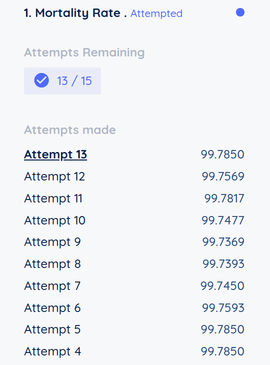

In [150]:
from IPython.display import Image
Image(filename='/home/1.jpg')

##### ______________________________________________________END________________________________________________________________________________________